In [2]:
import numpy as np
import cv2 as cv
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r'C:\Users\ibuku\Downloads\archive (4)\asl_dataset\asl_dataset/'
labels = ['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [4]:
# load the images and labels
labels = os.listdir(train_dir)
X_train = []
y_train = []
X_valid = []
y_valid = []

for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    for file in os.listdir(folderpath)[0:60]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[60:70]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2160, 224, 224, 3)
(2160,)
(355, 224, 224, 3)
(355,)


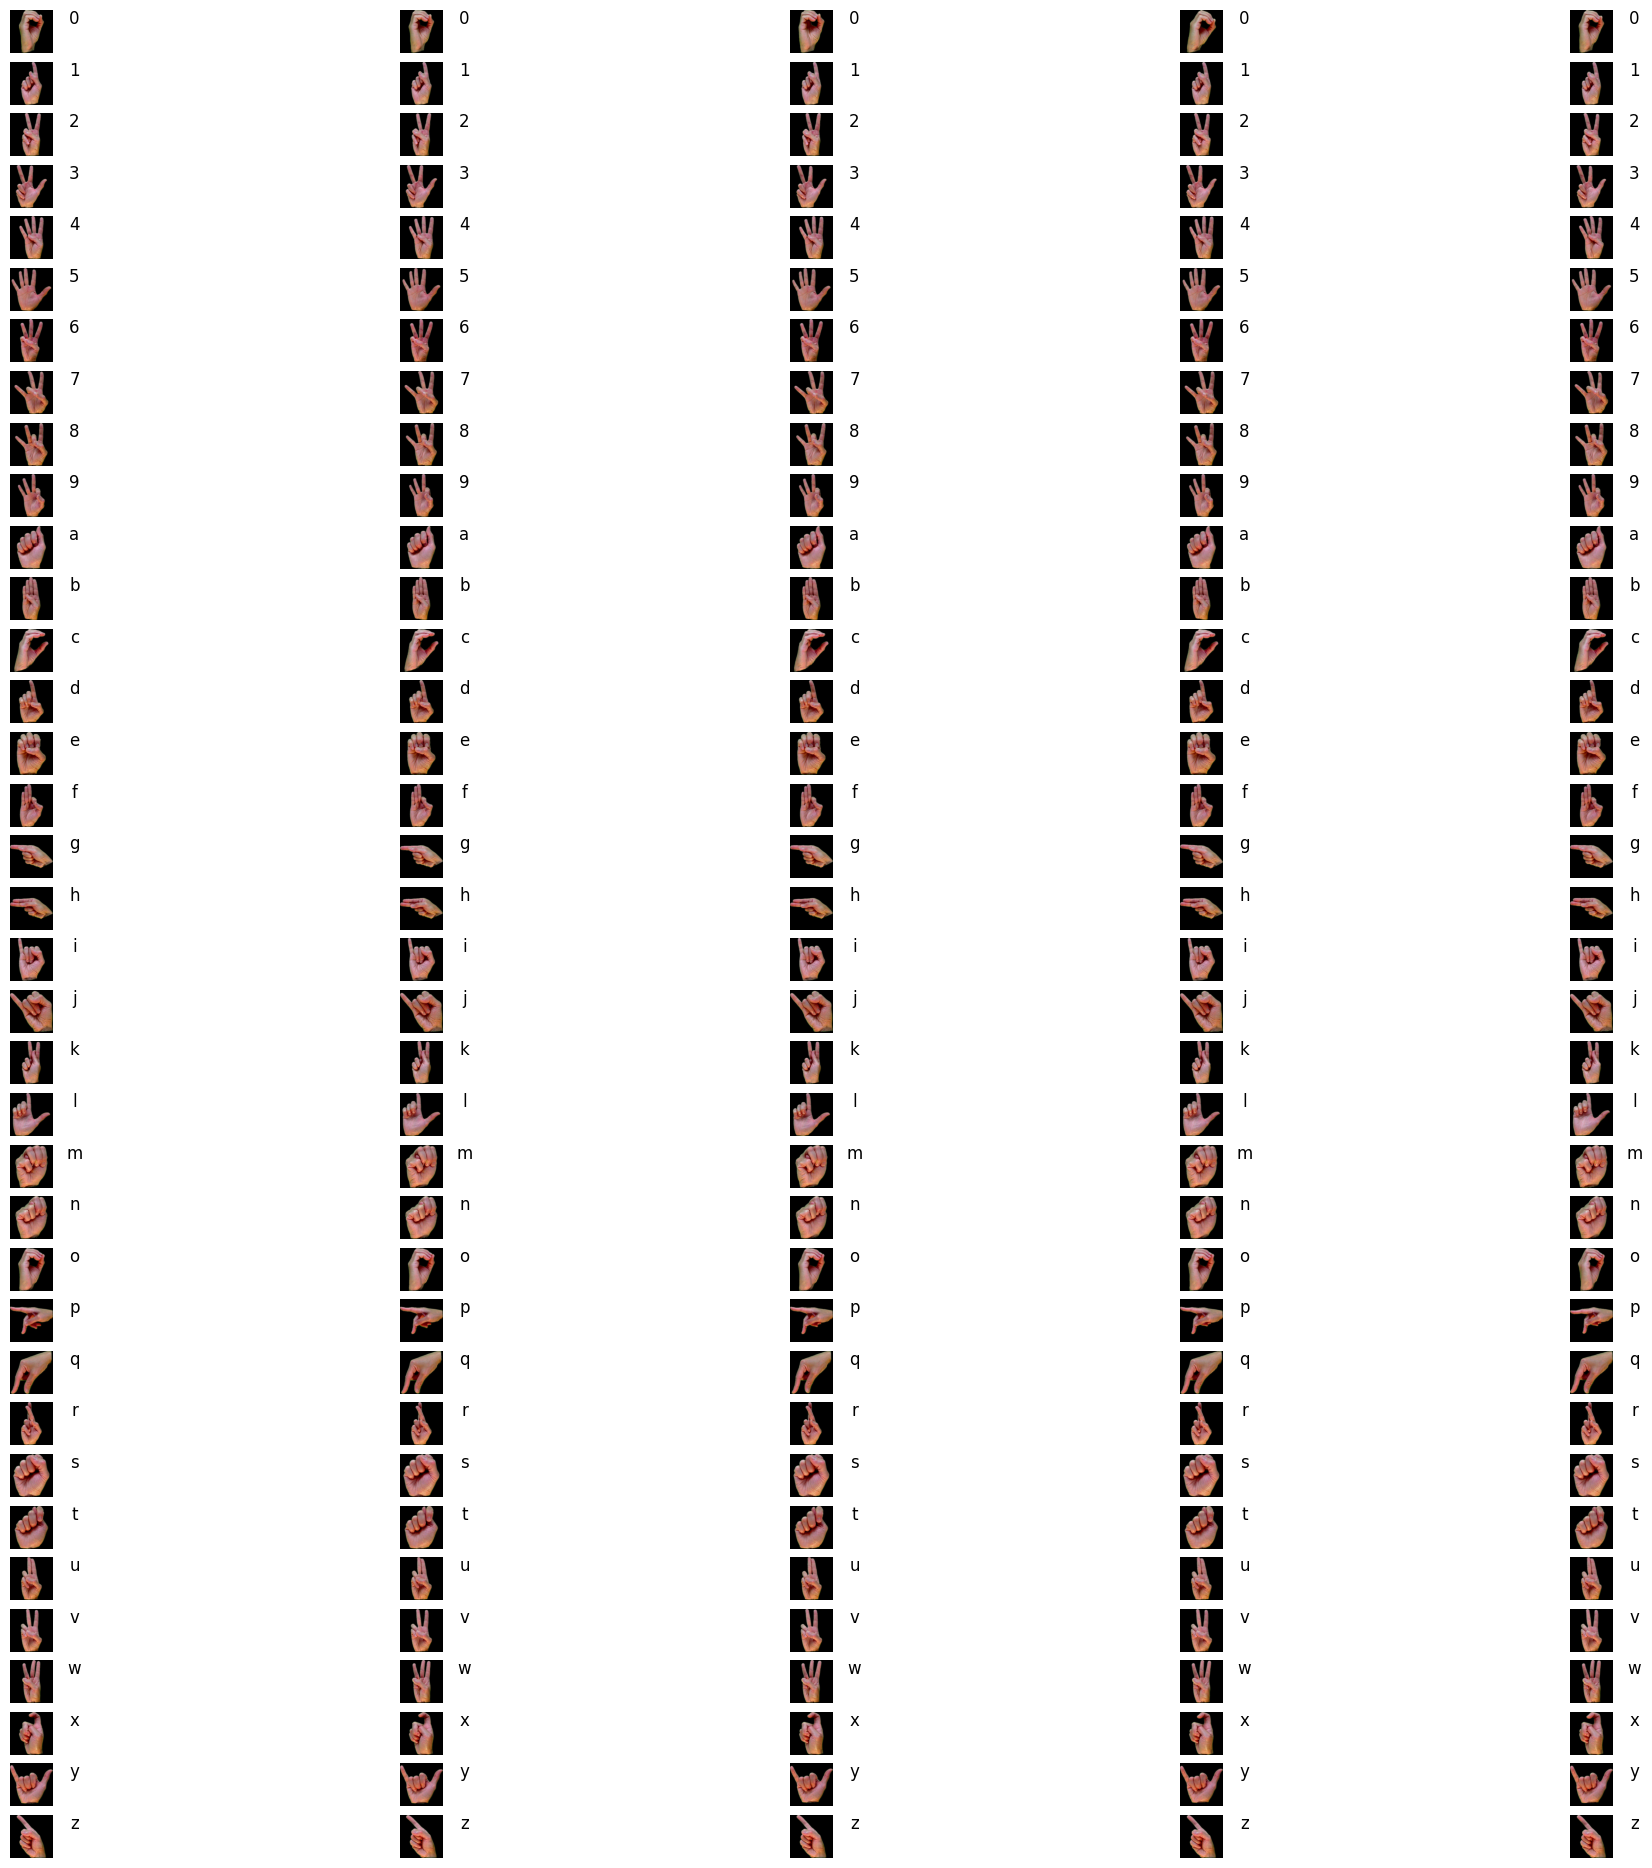

In [5]:
# display 5 random images with their labels
fig, axes = plt.subplots(nrows=len(labels), ncols=5, figsize=(24, 24))
fig.subplots_adjust(wspace=0.3)  # adjust spacing between image and text
for i, label in enumerate(labels):
    folderpath = train_dir + label + '/'
    img_names = os.listdir(folderpath)[:5]
    for j, img_name in enumerate(img_names):
        img_path = folderpath + img_name
        img = plt.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(label[:-1], fontsize=14)
        axes[i, j].text(1.5, 0.8, label[-1], fontsize=12, ha='center', va='center', transform=axes[i, j].transAxes)
plt.show()

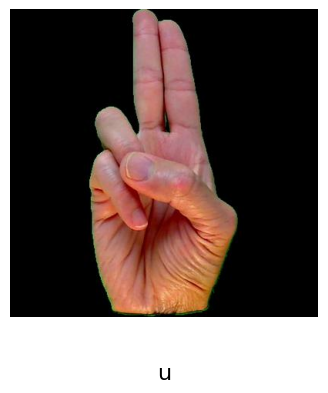

In [6]:
# choose a random label and a random image from the label folder
label = random.choice(labels)  # choose a random label
folderpath = train_dir + label + '/'
img_names = os.listdir(folderpath)[:3]
img_name = random.choice(img_names)  # choose a random image in the folder

# display the image with its label
fig, ax = plt.subplots(figsize=(4, 4))
img_path = folderpath + img_name
img = plt.imread(img_path)
ax.imshow(img)
ax.axis('off')
ax.text(0.5, -0.2, label, fontsize=16, ha='center', transform=ax.transAxes)

plt.show()

In [7]:
# Define the image size and number of classes
image_size = (64, 64)
num_classes = len(labels)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create an image data generator for data augmentation
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [10]:
# Load and preprocess the training dataset
train_dataset = data_generator.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2012 images belonging to 36 classes.


In [11]:
# Load and preprocess the validation dataset
val_dataset = data_generator.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 503 images belonging to 36 classes.


In [12]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 9s 119ms/step - loss: 2.0044 - accuracy: 0.4647 - val_loss: 0.8154 - val_accuracy: 0.7177
Epoch 2/10
63/63 [==============================] - 7s 114ms/step - loss: 0.4550 - accuracy: 0.8588 - val_loss: 0.5781 - val_accuracy: 0.7992
Epoch 3/10
63/63 [==============================] - 7s 116ms/step - loss: 0.1779 - accuracy: 0.9433 - val_loss: 0.5868 - val_accuracy: 0.8330
Epoch 4/10
63/63 [==============================] - 7s 115ms/step - loss: 0.1214 - accuracy: 0.9637 - val_loss: 0.6098 - val_accuracy: 0.8648
Epoch 5/10
63/63 [==============================] - 7s 114ms/step - loss: 0.0568 - accuracy: 0.9831 - val_loss: 0.5251 - val_accuracy: 0.8569
Epoch 6/10
63/63 [==============================] - 7s 117ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.6347 - val_accuracy: 0.8628
Epoch 7/10
63/63 [==============================] - 7s 118ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.6111 - val_accuracy: 0.8489
Epoch 

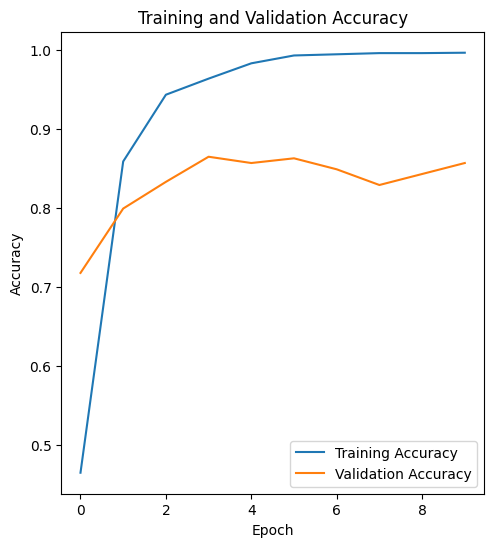

In [13]:
# Plot the validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


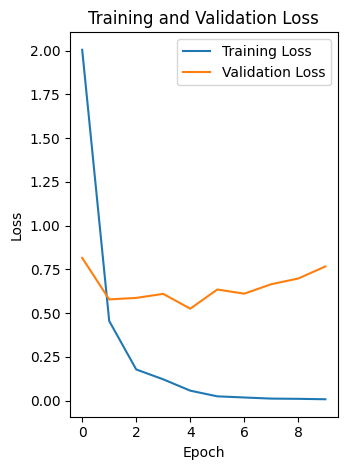

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
weights_file = 'path_to_trained_weights.h5'
if not os.path.isfile(weights_file):
    print("Error: The weights file does not exist.")
    print("Please provide the correct path to the trained weights file.")
    exit()

# Function to preprocess and predict an image
def predict_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0  # Normalize the image
    prediction = model.predict(image)
    predicted_label = labels[np.argmax(prediction)]
    return predicted_label

Error: The weights file does not exist.
Please provide the correct path to the trained weights file.


16/16 [==============================] - 1s 65ms/step


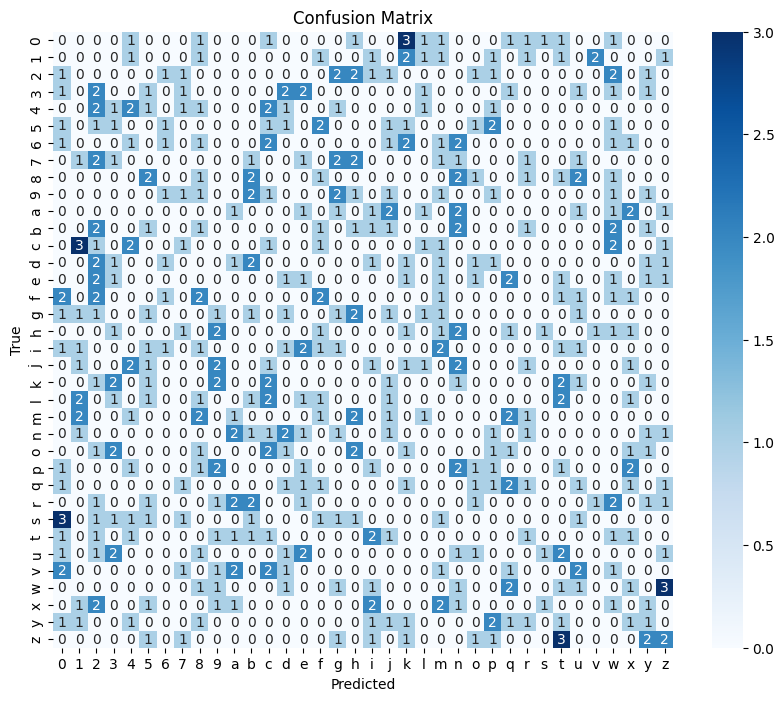

In [16]:
# Get the true labels and predicted labels for the validation dataset
y_true = val_dataset.classes
y_pred = model.predict(val_dataset).argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 101ms/step


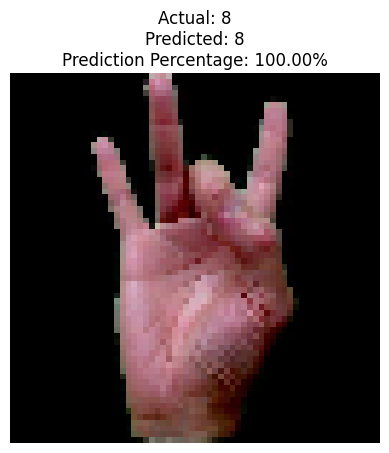

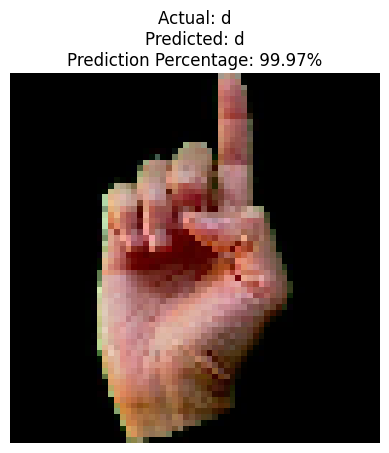

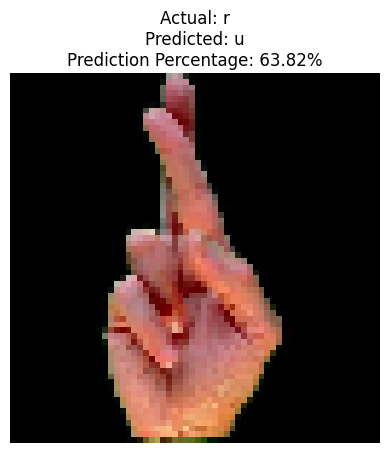

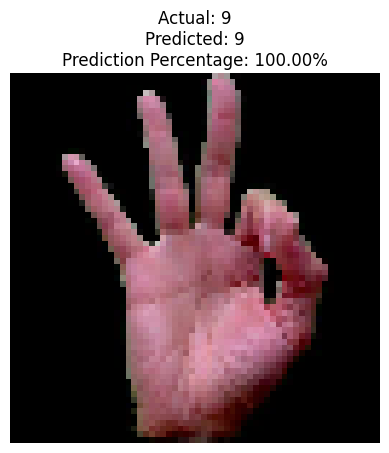

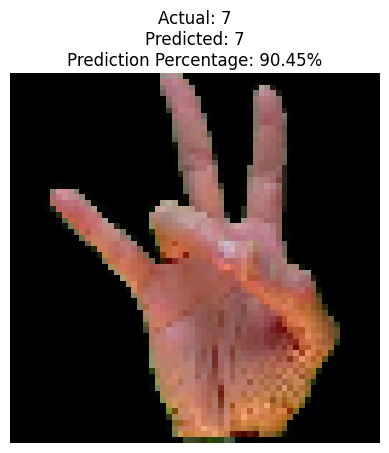

In [17]:
import random
import matplotlib.pyplot as plt

# Get a random batch of images from the validation dataset
random_indices = random.sample(range(len(val_dataset)), k=5)
random_images = [val_dataset[i][0][0] for i in random_indices]
actual_labels = [val_dataset[i][1][0] for i in random_indices]

# Predict the random images using the trained model
predictions = model.predict(np.array(random_images))

# Display the actual sign, prediction percentage, and image
for i in range(len(random_images)):
    actual_label = labels[np.argmax(actual_labels[i])]
    predicted_label = labels[np.argmax(predictions[i])]
    prediction_percentage = predictions[i][np.argmax(predictions[i])] * 100

    # Display the image
    plt.imshow(random_images[i])
    plt.axis('off')
    plt.title('Actual: {}\nPredicted: {}\nPrediction Percentage: {:.2f}%'.format(
        actual_label, predicted_label, prediction_percentage))
    plt.show()


Enter a label (alphabet or number) or "*" to quit: q
1/1 [==============================] - 0s 55ms/step


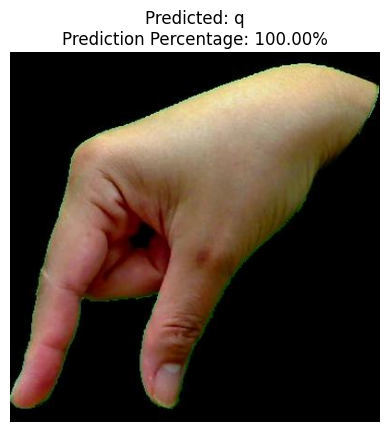

Actual label: q
Predicted label: q
Prediction percentage: 100.00%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: v
1/1 [==============================] - 0s 38ms/step


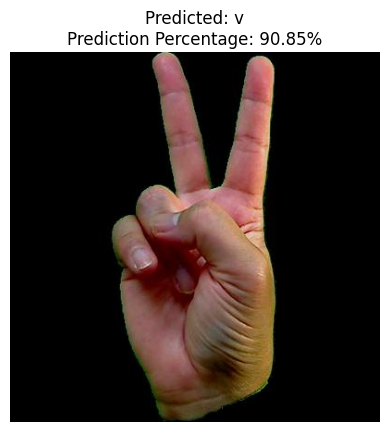

Actual label: v
Predicted label: v
Prediction percentage: 90.85%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: c
1/1 [==============================] - 0s 42ms/step


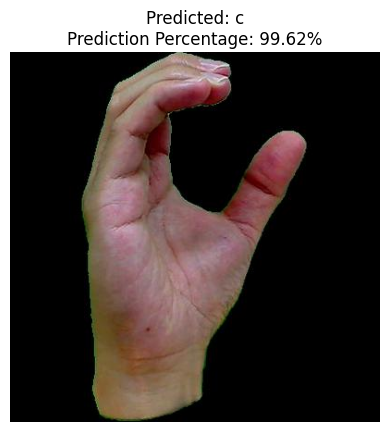

Actual label: c
Predicted label: c
Prediction percentage: 99.62%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: d
1/1 [==============================] - 0s 31ms/step


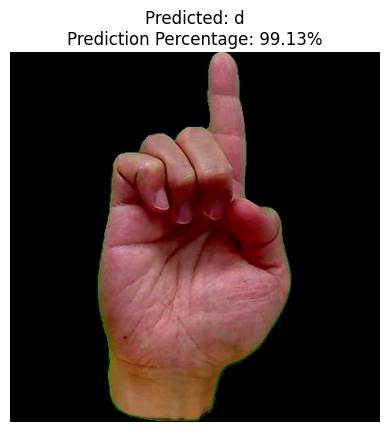

Actual label: d
Predicted label: d
Prediction percentage: 99.13%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: r
1/1 [==============================] - 0s 38ms/step


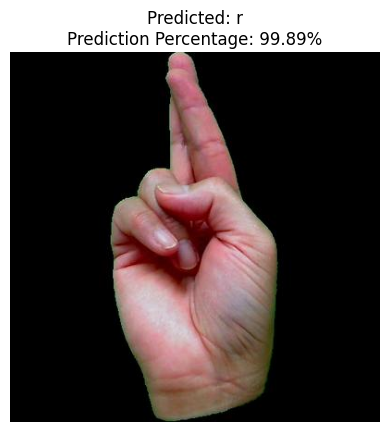

Actual label: r
Predicted label: r
Prediction percentage: 99.89%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: 4
1/1 [==============================] - 0s 34ms/step


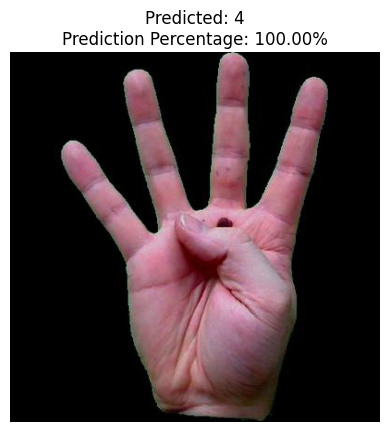

Actual label: 4
Predicted label: 4
Prediction percentage: 100.00%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: 7
1/1 [==============================] - 0s 34ms/step


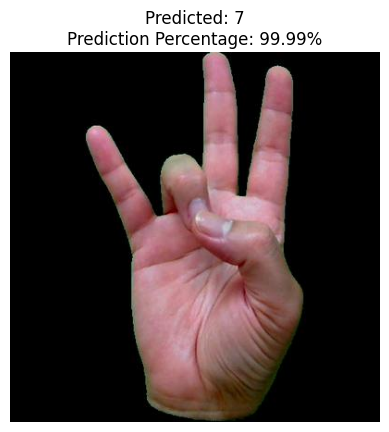

Actual label: 7
Predicted label: 7
Prediction percentage: 99.99%
Correct: True
Accuracy so far: 100.00%

Enter a label (alphabet or number) or "*" to quit: *


In [18]:

# Function to allow user input and display images and accuracy
def user_input_and_accuracy(labels, val_dataset, model):
    correct_predictions = 0
    total_predictions = 0
    while True:
        # Get user input
        user_input = input('Enter a label (alphabet or number) or "*" to quit: ').strip().lower()
        if user_input == '*':
            break
        if user_input not in labels:
            print("Invalid input. Please enter a valid label.")
            continue
        
        # Select a random image with the user input label
        label_index = labels.index(user_input)
        label_folder = train_dir + user_input + '/'
        img_name = random.choice(os.listdir(label_folder))
        img_path = label_folder + img_name
        img = cv.imread(img_path)
        img_resized = cv.resize(img, image_size)
        img_resized = np.expand_dims(img_resized, axis=0) / 255.0  # Rescale

        # Predict the image using the trained model
        prediction = model.predict(img_resized)
        predicted_label = labels[np.argmax(prediction)]
        prediction_percentage = prediction[0][np.argmax(prediction)] * 100

        # Display the image
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Predicted: {}\nPrediction Percentage: {:.2f}%'.format(predicted_label, prediction_percentage))
        plt.show()

        # Determine if the user's input is correct
        correct = user_input == predicted_label
        total_predictions += 1
        if correct:
            correct_predictions += 1

        # Calculate and display accuracy
        accuracy = (correct_predictions / total_predictions) * 100
        print(f"Actual label: {user_input}")
        print(f"Predicted label: {predicted_label}")
        print(f"Prediction percentage: {prediction_percentage:.2f}%")
        print(f"Correct: {correct}")
        print(f"Accuracy so far: {accuracy:.2f}%\n")
        
        # Check if accuracy is below 80%
        if accuracy < 80:
            print("Accuracy is below 80%. Please try again.")
            break

# Run the user input and accuracy display function
user_input_and_accuracy(labels, val_dataset, model)